In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Etapa 01 - Importação e Exploração Inicial da Base</h1>

In [97]:
df_salarios = pd.read_csv('salario_profissionais_dados.csv', sep=',', header=0)
df_salarios.head()

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [98]:
df_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [99]:
print(df_salarios.isnull().sum())
print('_____________________________')
print(df_salarios.shape)

work_year              0
country                0
region                 0
experience_level       0
job_title              0
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
years_of_experience    0
dtype: int64
_____________________________
(3755, 10)


<h2>Etapa 02 - Frequência e Distribuição das Categorias</h2>

In [100]:
print(df_salarios.value_counts('job_title', normalize=True).head(10))
print('\n')
print(df_salarios.value_counts('experience_level', normalize=True))
print('\n')
print(df_salarios.value_counts('company_size', normalize=True))

job_title
Data Engineer                0.276964
Data Scientist               0.223702
Data Analyst                 0.162983
Machine Learning Engineer    0.076964
Analytics Engineer           0.027430
Data Architect               0.026897
Research Scientist           0.021838
Data Science Manager         0.015446
Applied Scientist            0.015446
Research Engineer            0.009854
Name: proportion, dtype: float64


experience_level
SE    0.670040
MI    0.214381
EN    0.085220
EX    0.030360
Name: proportion, dtype: float64


company_size
M    0.839680
L    0.120905
S    0.039414
Name: proportion, dtype: float64


<h2>Etapa 03 - Estatísticas Descritivas</h2>

In [101]:
df_salarios['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

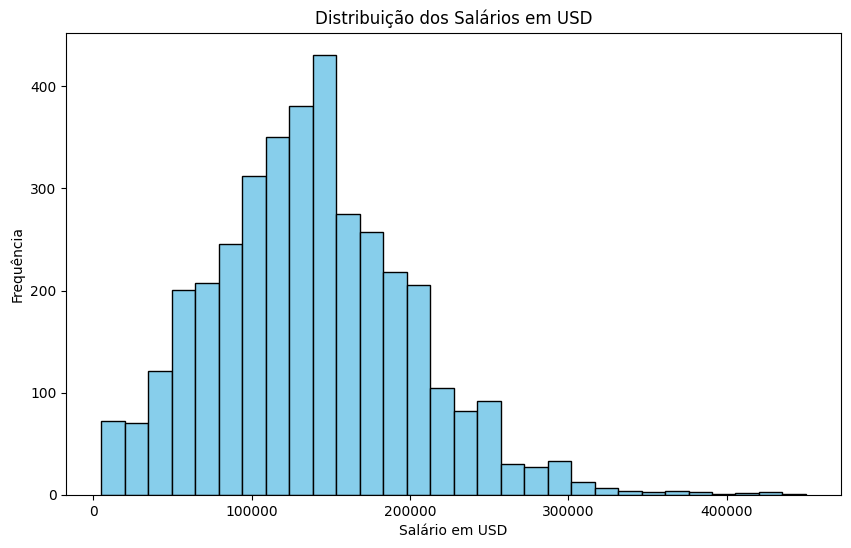

In [102]:
plt.figure(figsize=(10, 6))
plt.hist(df_salarios['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Salários em USD')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

In [103]:
media_salario = df_salarios.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False)
print(media_salario)

experience_level
EX    194930.929825
SE    153051.071542
MI    104525.939130
EN     78546.284375
Name: salary_in_usd, dtype: float64


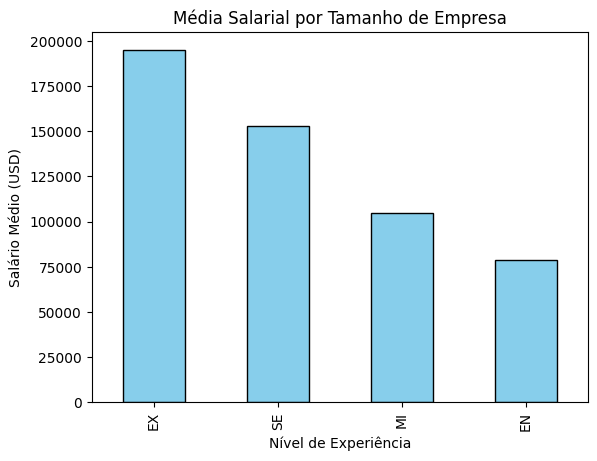

In [109]:
media_salario.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Média Salarial por Tamanho de Empresa")
plt.xlabel("Nível de Experiência")
plt.ylabel("Salário Médio (USD)")
plt.show()

<h2>Etapa 04 - Comparações por País</h2>

In [105]:
media_pais = df_salarios.groupby("country")["salary_in_usd"].mean().sort_values(ascending=False).head(10)
print(media_pais)

country
Israel                      423834.000000
Malaysia                    200000.000000
Puerto Rico                 166000.000000
United States of America    152822.011651
Canada                      132222.905882
China                       125404.000000
New Zealand                 125000.000000
Bosnia and Herzegovina      120000.000000
Ireland                     114943.428571
Dominican Republic          110000.000000
Name: salary_in_usd, dtype: float64


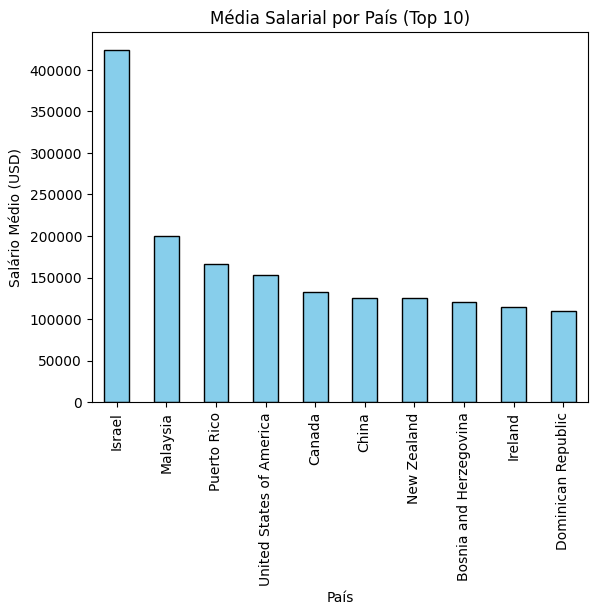

In [110]:
media_pais.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Média Salarial por País (Top 10)")
plt.xlabel("País")
plt.ylabel("Salário Médio (USD)")
plt.show()

<h2>Etapa 05 - Correlações e Tendências</h2>

In [107]:
colunas = ["salary_in_usd", "work_year", "years_of_experience"]
correlacoes = df_salarios[colunas].corr()
correlacoes

,salary_in_usd,work_year,years_of_experience
salary_in_usd,1.000000,0.228290,0.410723
work_year,0.228290,1.000000,0.178878
years_of_experience,0.410723,0.178878,1.000000


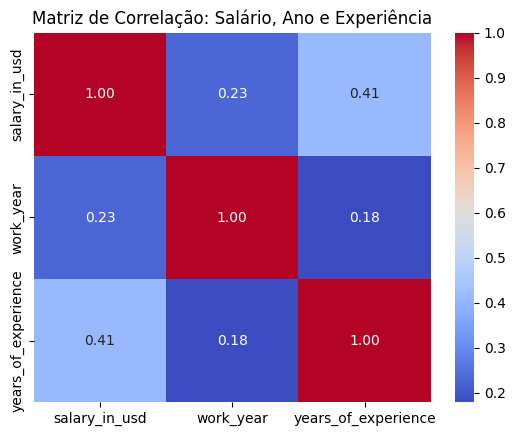

In [108]:
sns.heatmap(correlacoes, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação: Salário, Ano e Experiência")
plt.show()